<a href="https://colab.research.google.com/github/Lasal0425/ML_Coursework_Breast_Cancer_Detection/blob/main/Notebook03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, mean_squared_error, r2_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeRegressor, plot_tree
import joblib

In [ ]:
# Load the classification dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Coursework/cancer_classification_dataset.csv')
print("Dataset loaded successfully with shape:", df.shape)
print(df.head())

Dataset loaded successfully with shape: (4024, 16)
   Month_of_Birth   Age     Sex T_Stage N_Stage 6th_Stage  \
0              12  68.0  Female      T1      N1       IIA   
1              12  50.0  Female      T2      N2      IIIA   
2              11  58.0  Female      T3      N3      IIIC   
3               3  58.0  Female      T1      N1       IIA   
4               1  47.0  Female      T2      N1       IIB   

              Differentiated  Grade   A_Stage  Tumor_Size Estrogen_Status  \
0      Poorly differentiated      3  Regional         4.0        Positive   
1  Moderately differentiated      2  Regional        35.0        Positive   
2  Moderately differentiated      2  Regional        63.0        Positive   
3      Poorly differentiated      3  Regional        18.0        Positive   
4      Poorly differentiated      3  Regional        41.0        Positive   

  Progesterone_Status  Regional_Node_Examined  Reginol_Node_Positive  \
0            Positive                    24.0  

In [ ]:
print('Sex categories are:', df['Sex'].unique())
print('Sex categories are:', df['T_Stage'].unique())
print('Sex categories are:', df['N_Stage'].unique())
print('Sex categories are:', df['6th_Stage'].unique())
print('Sex categories are:', df['Differentiated'].unique())
print('Sex categories are:', df['A_Stage'].unique())
print('Sex categories are:', df['Grade'].unique())
print('Sex categories are:', df['Estrogen_Status'].unique())
print('Sex categories are:', df['Progesterone_Status'].unique())
print('Sex categories are:', df['Mortality_Status'].unique())

Sex categories are: ['Female' '1']
Sex categories are: ['T1' 'T2' 'T3' 'T4']
Sex categories are: ['N1' 'N2' 'N3']
Sex categories are: ['IIA' 'IIIA' 'IIIC' 'IIB' 'IIIB']
Sex categories are: ['Poorly differentiated' 'Moderately differentiated' 'Well differentiated'
 'Undifferentiated']
Sex categories are: ['Regional' 'Distant']
Sex categories are: [3 2 1 4]
Sex categories are: ['Positive' 'Negative']
Sex categories are: ['Positive' 'Negative']
Sex categories are: ['Alive' 'Dead' 'ALIVE' 'DEAD' 'ALive' 'alive' 'dead']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Month_of_Birth          4024 non-null   int64  
 1   Age                     4024 non-null   float64
 2   Sex                     4024 non-null   object 
 3   T_Stage                 4024 non-null   object 
 4   N_Stage                 4024 non-null   object 
 5   6th_Stage               4024 non-null   object 
 6   Differentiated          4024 non-null   object 
 7   Grade                   4024 non-null   int64  
 8   A_Stage                 4024 non-null   object 
 9   Tumor_Size              4024 non-null   float64
 10  Estrogen_Status         4024 non-null   object 
 11  Progesterone_Status     4024 non-null   object 
 12  Regional_Node_Examined  4024 non-null   float64
 13  Reginol_Node_Positive   4024 non-null   int64  
 14  Survival_Months         4024 non-null   

In [ ]:
# Convert Mortality_Status values to lowercase
df['Mortality_Status'] = df['Mortality_Status'].str.lower()

In [ ]:
# Map all variations to a standard format
df['Mortality_Status'] = df['Mortality_Status'].map({
    'alive': 'Alive',
    'dead': 'Dead',
})

# Check if there are any remaining inconsistencies
inconsistencies = df['Mortality_Status'].unique()
print("Remaining inconsistencies:", inconsistencies)

Remaining inconsistencies: ['Alive' 'Dead']


In [ ]:
# Import label encoder
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [ ]:
# Encode the categories in each object variable to a numeric form
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['T_Stage'] = label_encoder.fit_transform(df['T_Stage'])
df['N_Stage'] = label_encoder.fit_transform(df['N_Stage'])
df['6th_Stage'] = label_encoder.fit_transform(df['6th_Stage'])
df['Differentiated'] = label_encoder.fit_transform(df['Differentiated'])
df['A_Stage'] = label_encoder.fit_transform(df['A_Stage'])
df['Grade'] = label_encoder.fit_transform(df['Grade'])
df['Estrogen_Status'] = label_encoder.fit_transform(df['Estrogen_Status'])
df['Progesterone_Status'] = label_encoder.fit_transform(df['Progesterone_Status'])
df['Mortality_Status'] = label_encoder.fit_transform(df['Mortality_Status'])

# Check the categories' labels after the label encoding transformation is completed
print(df['Sex'].unique())
print(df['T_Stage'].unique())
print(df['N_Stage'].unique())
print(df['6th_Stage'].unique())
print(df['Differentiated'].unique())
print(df['A_Stage'].unique())
print(df['Grade'].unique())
print(df['Estrogen_Status'].unique())
print(df['Progesterone_Status'].unique())
print(df['Mortality_Status'].unique())


[1 0]
[0 1 2 3]
[0 1 2]
[0 2 4 1 3]
[1 0 3 2]
[1 0]
[2 1 0 3]
[1 0]
[1 0]
[0 1]


In [ ]:
import joblib
# Load models
knn_model = joblib.load('/content/drive/MyDrive/Colab Notebooks/Coursework/sample_databest_knn_model.pkl')
log__model = joblib.load('/content/drive/MyDrive/Colab Notebooks/Coursework/sample_databest_logreg_model.pkl')
nb_model = joblib.load('/content/drive/MyDrive/Colab Notebooks/Coursework/sample_databest_naive_bayes_model.pkl')

In [ ]:
from sklearn.ensemble import VotingClassifier

#create a dictionary of our base learner models
base_learners=[('KNN',knn_model), ('LR', log__model)]

#create our voting classifier, inputting our models
ensemble_learner = VotingClassifier(base_learners, voting='hard')

In [ ]:
from sklearn.model_selection import train_test_split
# Drop unused column for classification
X_class = df.drop(columns=["Mortality_Status"])
y_class = df["Mortality_Status"]

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X_class, y_class, test_size=0.2, stratify=y_class, random_state=42
)

Classification report for Ensmebler
              precision    recall  f1-score   support

           0       0.89      0.99      0.93       682
           1       0.80      0.29      0.43       123

    accuracy                           0.88       805
   macro avg       0.84      0.64      0.68       805
weighted avg       0.87      0.88      0.86       805

confusion_matrix for ensember learner


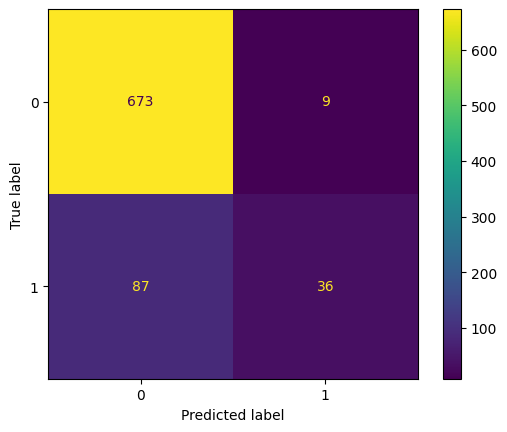

In [ ]:
#fit model to training data
ensemble_learner = ensemble_learner.fit(X_train, y_train)
y_pred_ensembler = ensemble_learner.predict(X_test)

# Evaluate your ensemble model by generating the classification report and the confusion matrix
from sklearn.metrics import classification_report
print("Classification report for Ensmebler")
print(classification_report(y_test,y_pred_ensembler))

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

print("confusion_matrix for ensember learner")
ensemble_learner_cm=confusion_matrix(y_test,y_pred_ensembler)
disp=ConfusionMatrixDisplay(confusion_matrix=ensemble_learner_cm,display_labels = ensemble_learner.classes_)
disp.plot()

In [ ]:
from sklearn.ensemble import VotingClassifier

#create a dictionary of our base learner models
base_learners=[('KNN',knn_model), ('LR', log__model)]

#create our voting classifier, inputting our models
ensemble_learner = VotingClassifier(base_learners, voting='soft')

Classification report for Ensmebler
              precision    recall  f1-score   support

           0       0.89      0.98      0.94       682
           1       0.79      0.36      0.49       123

    accuracy                           0.89       805
   macro avg       0.84      0.67      0.71       805
weighted avg       0.88      0.89      0.87       805

confusion_matrix for ensember learner


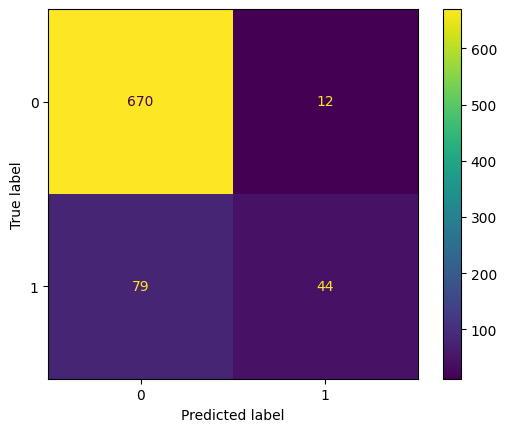

In [ ]:
#fit model to training data
ensemble_learner = ensemble_learner.fit(X_train, y_train)
y_pred_ensembler = ensemble_learner.predict(X_test)

# Evaluate your ensemble model by generating the classification report and the confusion matrix
from sklearn.metrics import classification_report
print("Classification report for Ensmebler")
print(classification_report(y_test,y_pred_ensembler))

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

print("confusion_matrix for ensember learner")
ensemble_learner_cm=confusion_matrix(y_test,y_pred_ensembler)
disp=ConfusionMatrixDisplay(confusion_matrix=ensemble_learner_cm,display_labels = ensemble_learner.classes_)
disp.plot()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv('/content/drive/MyDrive/cancer_regression_dataset.csv')

# Encode categorical variables
cat_cols = ['Sex','T_Stage','N_Stage','6th_Stage','Differentiated','Grade','A_Stage','Estrogen_Status','Progesterone_Status']
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# Prepare features and target
X = df.drop(['Survival_Months', 'Mortality_Status'], axis=1)
y = df['Survival_Months']

# Split data with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=43)